<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Data Analysis and Visualization</div>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Comparing means with ANOVA

The next means comparison strategy we will investigate is the ANOVA, or ANalysis Of VAriance. This is a means comparison strategy that is often used in the life sciences. The name can be a bit confusing, as this test detects differences among means by calculating the ratios between different variance components - specifically the ratio of the variance between samples (which corresponds to the variance among species, experimental treatments, localities, or whatever else we may be comparing) to the variance within samples (the error or residual variance, variability in the data that cannot be attributed to our experimental factors).  

Similarly to how the the t-test assigned statistical significance by calculating a t-statistic that is then compared to a table of t-values, the ANOVA assigns statistical significance by calculating an **F-statistic** that is compared to a table of F-values. Most simply this can be represented as:

F = <u>between sample variance</u>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;within sample variance

In this notebook we will compare three different types of ANOVA:
* In a **one-way ANOVA**, we will compare multiple sample means
* In a **two-way ANOVA**, we will compare sample means that are affected by more than one experimental factor
* In a **randomized block ANOVA**, which we will just touch on briefly, we will look at how random factors can be analyzed

**Note 1** ANOVAs can get very complicated very quickly! ANOVAs are calculated differently when sample sizes between groups are different or the same, or when the factors included in an ANOVA are fixed (meaningful beyond the bounds of the experiment being considered, such as level of fertilizer applied, or sex of the study organism) or random (meaning factors that might be expected to vary in unpredictable ways, such as different cages in which lab mice are housed, or fields in which plants are grown). Understanding these differences is very important and planning an experiment that requires ANOVA should be done in consultation with a statistician or an experienced practitioner. 

**Note 2** Many of the resources you will find online about using ANOVA will assume that you are using R statistical software. Running an ANOVA in R will have a different syntax than in python, but the fundamentals are very similar. 


# Comparing multiple means with one-way ANOVA

The simplest application of ANOVA is to compare three or more means to one another. If a two-sample t-test asks 'Does sample A differ from sample B?' a one way ANOVA asks 'Do samples A, B, C, ... differ from one another?'

Let's load up a dataset. In the `data` folder is a file called `test_aves.csv`. In the code window below, load that dataset up and print out the header to make sure you have it. 

The data set consists of a 1000 average exam scores in three areas: calculus, chemistry, and biology.

In [8]:
test_aves = pd.read_csv('data/test_aves.csv', usecols=['calc', 'chem', 'biol'])   ## FIX SUPPRESS INDEX
test_aves.head()

,calc,chem,biol
0,85.618750,78.032658,86.742013
1,80.735941,87.272910,87.041645
2,73.715539,87.070292,90.549435
3,84.758469,84.868836,88.140137
4,81.107428,86.532147,82.976099


Hopefully you see the data in front of you. (If you have peeked at the data you might see that we are ignoring some columns ... we will come back to them with the more complex ANOVAs below right now we are going to pretend that those columns don't exist.) 

First things first, before we start comparing means, let's explore the data. ANOVA has three major assumptions, which are fundamentally the same as the assumptions of regression 1) that the data points are independent of one another 2) that the samples are drawn from a normal distribution, and 3) that the groups being compared have similar variances. Assume that the scores are a random collection of scores from each university, such that each data series in the dataframe is independent, or in other words that the rows don't mean anything. 

Assumption 1) is really a question of experimental design. To start, we will assume that each of these observations is simply a list of the 1000 most recent test averages in each of these disciplines, such that the rows do not represent individual students. That would make things a little trickier, as each student's scores would violate the assumption of independence.

Assumption 2) the noramlity assumption, is trickier and often misstated (try googling it, you will see). An immediate thought might be that we can test this by checking to see if the data is distributed normally, but let's think about that for a second. What if the average test score in each subject was in fact very different? We might expect to see three different curves centered around the average scores for each subject. This would not be a normal distribution of the data! The actual assumption of normality is that the residuals are normally distributed. In the case of a one-way ANOVA, that means the differences between the observed data in each group and the mean of each group should themselves be normally distributed.

Assumption 3) is relatively straightforward. Each group must have similar variances. This compares to the regression assumption that variance in y stays constant as the value of x increases, but this is now translated into a situation in which we compare different groups. 



### Exercise 1. 

In the code window below, take a pass at using the tools we have learned so far to demonstrate that each of these three conditions is met. You can use visualizations or other statistical tests to do so. You may want to compare the variance directly, plot the data with a histogram, or use the Q-Q plot introduced in the t-test section. 


              calc         chem         biol
count  1000.000000  1000.000000  1000.000000
mean     82.134949    85.040435    88.188919
std       3.997851     4.123261     4.140144
min      69.479334    69.980540    73.520977
25%      79.296607    82.494599    85.228198
50%      82.020194    85.038547    88.292955
75%      84.805774    87.810428    91.009472
max      95.250387    98.055125    99.983518



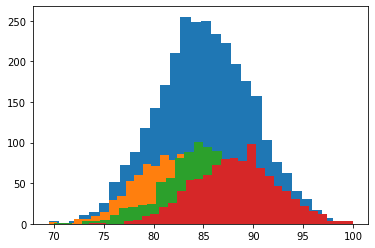


skewtest
all SkewtestResult(statistic=0.3274471158975927, pvalue=0.7433297354613322)
calc SkewtestResult(statistic=0.9924956748062979, pvalue=0.3209557882994559)
chem SkewtestResult(statistic=-1.6094505201034546, pvalue=0.10751786606539863)
biol SkewtestResult(statistic=-0.739693691750071, pvalue=0.4594858766737874)

shapiro
all ShapiroResult(statistic=0.9993169903755188, pvalue=0.342641144990921)
calc ShapiroResult(statistic=0.998918890953064, pvalue=0.8285098671913147)
chem ShapiroResult(statistic=0.99759840965271, pvalue=0.1519262194633484)
biol ShapiroResult(statistic=0.998859167098999, pvalue=0.7925372123718262)

normaltest
all NormaltestResult(statistic=4.716541994640028, pvalue=0.09458361722890887)
calc NormaltestResult(statistic=1.2240228361485532, pvalue=0.5422590617243912)
chem NormaltestResult(statistic=4.7559931909925925, pvalue=0.092736179610111)
biol NormaltestResult(statistic=1.2156795389099107, pvalue=0.5445259009314558)

kurtosistest
all KurtosistestResult(statistic=-

In [9]:
###
### Your code here
###
print(test_aves.describe())

print ()

###
all_tests = test_aves['calc'].to_list() + test_aves['chem'].to_list() + test_aves['biol'].to_list()
plt.hist(all_tests,30)
plt.hist(test_aves['calc'], 30)
plt.hist(test_aves['chem'], 30)
plt.hist(test_aves['biol'], 30)

plt.show()

###

print()
print('skewtest')
print('all', stats.skewtest(all_tests))
print('calc', stats.skewtest(test_aves['calc']))
print('chem', stats.skewtest(test_aves['chem']))
print('biol', stats.skewtest(test_aves['biol']))

print()
print('shapiro')
print('all', stats.shapiro(all_tests))
print('calc', stats.shapiro(test_aves['calc']))
print('chem', stats.shapiro(test_aves['chem']))
print('biol', stats.shapiro(test_aves['biol']))

print()
print('normaltest')
print('all', stats.normaltest(all_tests))
print('calc', stats.normaltest(test_aves['calc']))
print('chem', stats.normaltest(test_aves['chem']))
print('biol', stats.normaltest(test_aves['biol']))

print()
print('kurtosistest')
print('all', stats.kurtosistest(all_tests))
print('calc', stats.kurtosistest(test_aves['calc']))
print('chem', stats.kurtosistest(test_aves['chem']))
print('biol', stats.kurtosistest(test_aves['biol']))

# NEED QQ PLOT CODE HERE


In this case a p value of < 0.05 would indicate that we were observing a significant deviation from normality. We observe that only for kurtosis of the combined data. These are very powerful tests of deviations from normality.

The most important data are actually in our first two results, from which we can see that the standard deviations for each group are approximately equal and each group is an approximately normal distribution.

Notice that none of these test directly answered the question of whether the residuals were normally distributed. Inm order to do that we would first have to run the statistical test in order to generate the residuals. 


In a one-way ANOVA we just want to compare groups means. In some ways this is the last of the simple tests. 


### Exercise 2. 

Run a one-way anova and visualize the results.  

compare to a boxplot of the means

In [10]:
stats.f_oneway(test_aves['calc'], test_aves['chem'], test_aves['biol'])

F_onewayResult(statistic=548.6829747046579, pvalue=8.982125828141596e-204)

## Post hoc tests with one-way ANOVA
This is kind of underwhelming - we get an F statistic and a (highly significant) p value. But we don't get any statements about what is significant. This simple p value just tells us that the groups are not drawn from the same distribution. To determine which groups are different from one another, we need to do what is known as a post-hoc test. 

The test we would use in this circumstance is the Tukey HSD test, where HSD means Highly Significant Differences. 

In [11]:
print(stats.tukey_hsd(test_aves['calc'], test_aves['chem'], test_aves['biol']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.905    -0.000    -3.334    -2.477
 (0 - 2)     -6.054    -0.000    -6.483    -5.625
 (1 - 0)      2.905    -0.000     2.477     3.334
 (1 - 2)     -3.148    -0.000    -3.577    -2.720
 (2 - 0)      6.054    -0.000     5.625     6.483
 (2 - 1)      3.148    -0.000     2.720     3.577



This table gives us the comparison between each group. NOTES HERE - MAKE TWO SAME ONE DIFF SO COMPARISON IS OBVIOUS

### Exercise x - 
What do you think this table is telling us?


Write your answer here 

## ANOVA tables and `statsmodels`
Reporting an ANOVA is more complicated than just F, and p, however, see this for how to make a table. https://www.reneshbedre.com/blog/anova.html . One problem with the stats library is that it's reporting functions are very rudimentary and we aren't getting any of that information. 

We also don't have any way to access the information from the ANOVA analysis since the `stats` anova approach is so simple. 

Here we need to go to a different, more sophisticated tool. The one that is going to give us the most flexibility is the `statsmodels` library which we will see improves reporting AND gives us the flexibility to do different types of ANOVA. 

`statsmodels` is, as the name implies, a models-based approach. In essence what we are going to do is to create a statistical model which is fit to the data. 

An important thing about statsmodels is that we can't use it on just any data structure. We need the datat to be in a fully-expanded of long formal. Our data is pretty simple so we can use the handy pandas function `melt` to do this conversion. 


### Exercise 3. 

Make an ANOVA table 

In [16]:
import statsmodels as sm
from statsmodels.formula.api import ols

test_aves_long = test_aves.melt()
print(test_aves_long)



     variable      value
0        calc  85.618750
1        calc  80.735941
2        calc  73.715539
3        calc  84.758469
4        calc  81.107428
...       ...        ...
2995     biol  89.004067
2996     biol  84.516857
2997     biol  87.993931
2998     biol  92.449446
2999     biol  87.861511

[3000 rows x 2 columns]


Now we are ready to apply the model

The model takes use the tilde as an operator. This follows the pattern of the R language. The first value in the model is y - which in our 'melted' data set is the column 'variable'. The C operator lets the model know that this is categorical data, and not a continuous x value (for say, performing a regression). 


In [17]:
model = ols('value ~ C(variable)', data = test_aves_long).fit()
one_way_table = sm.stats.anova_lm(model, typ=2)
one_way_table



AttributeError: module 'statsmodels.stats' has no attribute 'anova_lm'

     variable      value
0        calc  85.618750
1        calc  80.735941
2        calc  73.715539
3        calc  84.758469
4        calc  81.107428
...       ...        ...
2995     biol  89.004067
2996     biol  84.516857
2997     biol  87.993931
2998     biol  92.449446
2999     biol  87.861511

[3000 rows x 2 columns]






TEXT describe post-hoc tests
### Exercise 4. 

run a post-hoc test on the ANOVA data

# Two-way analysis of variance

Description read in full data set:     students from four universities, Male and Female, and their

### Exercise 4.  

run two way ANOVA on data sex vs. score , definitely use stats models for this

![TJU logo image](images/TJU_logo_image.png "TJU logo image")